PyPDF2 Accuracy Test

In [2]:
!pip install pypdf

In [23]:
from pypdf import PdfReader

def extract_text_with_pypdf(pdf_path):
    """
    Extract text from a PDF file using PyPDF library.
    
    Args:
        pdf_path (str): Path to the PDF file
        
    Returns:
        str: Extracted text from the PDF
    """
    try:
        # Create a PDF reader object
        reader = PdfReader(pdf_path)
        
        # Print number of pages
        print(f"Number of Pages: {len(reader.pages)}")
        print("-" * 50)
        
        # Extract text from each page
        all_text = ""
        for i, page in enumerate(reader.pages):
            print(f"Page {i+1}:")
            text = page.extract_text()
            print(text)
            print("-" * 50)
            all_text += text + "\n"
            
        return all_text
        
    except Exception as e:
        print(f"Error: {e}")
        return None

if __name__ == "__main__":
    # Specify the PDF file path directly in the code
    pdf_path = "/home/pradycr7/Projects/pdf-llm-backend/samples/sample_invoices/sample-invoice.pdf"  # Change this to your PDF file path
    
    # Extract text from the PDF
    extracted_text = extract_text_with_pypdf(pdf_path)
    
    # You can also save the extracted text to a file
    # with open("output_pypdf.txt", "w", encoding="utf-8") as f:
    #     f.write(extracted_text)


Number of Pages: 3
--------------------------------------------------
Page 1:
CPB Software (Germany) GmbH - Im Bruch 3 - 63897 Miltenberg/Main
Musterkunde AG
Mr. John Doe
Musterstr. 23
12345 Musterstadt Name:  Stefanie Müller
Phone: +49 9371 9786-0
Invoice WMACCESS Internet
VAT No. DE199378386
Invoice No
123100401
Amount
-without VAT- quantity
130,00 € 1
10,00 € 0
50,00 € 0
1.000,00 € 0
10,00 € 0
0,58 € 14
0,70 € 0
1,50 € 162
0,50 € 0
0,80 € 0
1,80 € 0
0,30 € 0
0,30 € 0
0,40 € 0
0,40 € 0
0,30 € 0
0,30 € 0
Terms of Payment: Immediate payment without discount. Any bank charges must be paid by the invoice recipient.
Bank fees at our expense will be charged to the invoice recipient!
Please credit the amount invoiced to IBAN DE29 1234 5678 9012 3456 78 | BIC GENODE51MIC (SEPA Credit Transfer)
This invoice is generated automatically and will not be signed
Transaction Fee T6 0,00 €
130,00 €
Basis fee for additional user accounts 0,00 €
0,00 €
0,00 €
Basic Fee wmPos
Change of user accounts
Tra

pdfplumber Accuracy Test

In [5]:
!pip install pdfplumber

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.0 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pdfplumber] 1/3 [pdfminer.six]


In [27]:
import pdfplumber

def extract_text_with_pdfplumber(pdf_path):
    """
    Extract text from a PDF file using pdfplumber library.
    
    Args:
        pdf_path (str): Path to the PDF file
        
    Returns:
        str: Extracted text from the PDF
    """
    try:
        # Open the PDF file
        with pdfplumber.open(pdf_path) as pdf:
            # Print number of pages
            print(f"Number of Pages: {len(pdf.pages)}")
            print("-" * 50)
            
            # Extract text from each page
            all_text = ""
            for i, page in enumerate(pdf.pages):
                print(f"Page {i+1}:")
                text = page.extract_text(layout=True)
                print(text)
                print("-" * 50)
                all_text += text + "\n"
                
            return all_text
            
    except Exception as e:
        print(f"Error: {e}")
        return None

if __name__ == "__main__":
    # Specify the PDF file path directly in the code
    pdf_path = "/home/pradycr7/Projects/pdf-llm-backend/samples/sample_invoices/sample-invoice.pdf"  # Change this to your PDF file path
    
    # Extract text from the PDF
    extracted_text = extract_text_with_pdfplumber(pdf_path)
    
    # You can also save the extracted text to a file
    # with open("output_pdfplumber.txt", "w", encoding="utf-8") as f:
    #     f.write(extracted_text)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Number of Pages: 3
--------------------------------------------------
Page 1:
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
         

Plot the Text Extractor Accuracy based on content distribution of the PDF

In [11]:
!pip install pandas matplotlib

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyparsing]


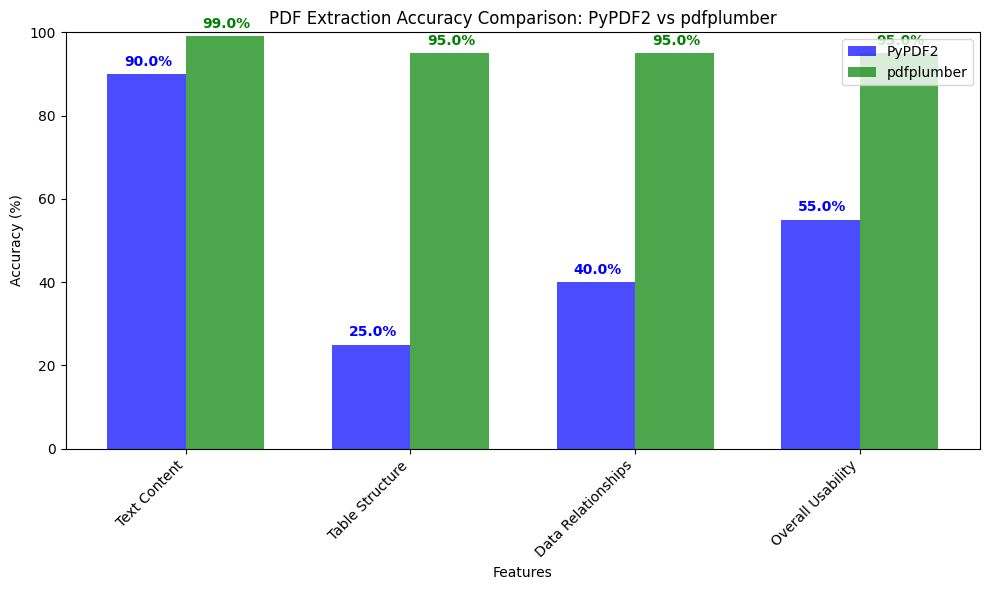

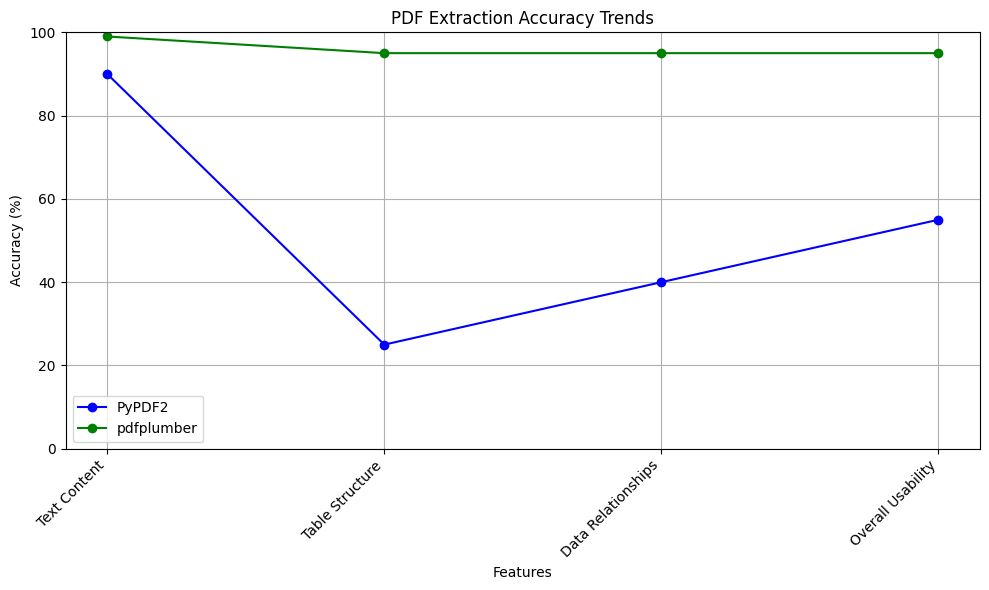

Plots successfully generated and saved as 'pdf_extraction_comparison_bar.png' and 'pdf_extraction_comparison_line.png'


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_pdf_extraction_comparison(csv_file_path):
    """
    Create comparison plots for PDF extraction accuracy from CSV data.
    Args:
        csv_file_path (str): Path to the CSV file containing comparison data
    """
    try:
        # Read the CSV file
        # Try first with comma separator, then with tab separator if that fails
        try:
            comparison_df = pd.read_csv(csv_file_path)
        except:
            comparison_df = pd.read_csv(csv_file_path, sep='\t')
        
        # Check required columns
        required_columns = ['Feature', 'PyPDF2', 'pdfplumber']
        for col in required_columns:
            if col not in comparison_df.columns:
                print(f"Error: CSV file must contain column '{col}'")
                return
                
        # Convert percentage strings to float values if they contain '%'
        for col in ['PyPDF2', 'pdfplumber']:
            if comparison_df[col].dtype == object:  # If it's string/object type
                comparison_df[col] = comparison_df[col].str.rstrip('%').astype(float)
        
        # Calculate y-axis max value for scaling
        max_value = max(comparison_df['PyPDF2'].max(), comparison_df['pdfplumber'].max())
        y_max = min(int(max_value * 1.2), 100)  # Add 20% buffer, cap at 100%
        
        # Plot 1: Bar chart
        plt.figure(figsize=(10, 6))
        bar_width = 0.35
        index = np.arange(len(comparison_df))  # Use numpy array instead of range
        
        plt.bar(index, comparison_df['PyPDF2'], bar_width, label='PyPDF2', color='blue', alpha=0.7)
        plt.bar(index + bar_width, comparison_df['pdfplumber'], bar_width, label='pdfplumber', color='green', alpha=0.7)
        
        plt.xlabel('Features')
        plt.ylabel('Accuracy (%)')
        plt.title('PDF Extraction Accuracy Comparison: PyPDF2 vs pdfplumber')
        plt.xticks(index + bar_width / 2, comparison_df['Feature'], rotation=45, ha='right')
        plt.ylim(0, y_max)
        plt.legend()
        
        # Value labels
        for i, (pypdf2_val, pdfplumber_val) in enumerate(zip(comparison_df['PyPDF2'], comparison_df['pdfplumber'])):
            plt.text(i - 0.1, pypdf2_val + 2, f"{pypdf2_val:.1f}%", color='blue', fontweight='bold')
            plt.text(i + bar_width - 0.1, pdfplumber_val + 2, f"{pdfplumber_val:.1f}%", color='green', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('pdf_extraction_comparison_bar.png')
        plt.show()
        
        # Plot 2: Line chart
        plt.figure(figsize=(10, 6))
        plt.plot(comparison_df['Feature'], comparison_df['PyPDF2'], marker='o', linestyle='-', color='blue', label='PyPDF2')
        plt.plot(comparison_df['Feature'], comparison_df['pdfplumber'], marker='o', linestyle='-', color='green', label='pdfplumber')
        
        plt.xlabel('Features')
        plt.ylabel('Accuracy (%)')
        plt.title('PDF Extraction Accuracy Trends')
        plt.ylim(0, y_max)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        plt.savefig('pdf_extraction_comparison_line.png')
        plt.show()
        
        print("Plots successfully generated and saved as 'pdf_extraction_comparison_bar.png' and 'pdf_extraction_comparison_line.png'")
    
    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: '{csv_file_path}' is empty.")
    except pd.errors.ParserError:
        print(f"Error: '{csv_file_path}' is not a valid CSV file.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    # Set your CSV file path here
    csv_path = "/home/pradycr7/Projects/pdf-llm-backend/samples/text_extractor_comparion.csv"
    plot_pdf_extraction_comparison(csv_path)